In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [25]:
file_paths = [
    "data/Sales_April_2019.csv",
    "data/Sales_August_2019.csv",
    "data/Sales_December_2019.csv",
    "data/Sales_February_2019.csv",
    "data/Sales_January_2019.csv",
    "data/Sales_July_2019.csv",
    "data/Sales_June_2019.csv",
    "data/Sales_March_2019.csv",
    "data/Sales_May_2019.csv",
    "data/Sales_November_2019.csv",
    "data/Sales_October_2019.csv",
    "data/Sales_September_2019.csv"
]


In [26]:
dfs = [pd.read_csv(file) for file in file_paths]
df = pd.concat(dfs, ignore_index=True)


In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [29]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [30]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.drop(columns="Order ID",axis=1,inplace=True)

**datatype conversion**

In [33]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"],errors="coerce")

In [34]:
df["Price Each"] = pd.to_numeric(df["Price Each"],errors="coerce")

In [35]:
df["Order Date"] = pd.to_datetime(df["Order Date"],errors="coerce")

In [36]:
df.head(2)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           186305 non-null  object        
 1   Quantity Ordered  185950 non-null  float64       
 2   Price Each        185950 non-null  float64       
 3   Order Date        185950 non-null  datetime64[ns]
 4   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 8.5+ MB


In [38]:
df.isnull().sum()

Product               0
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address      0
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df.isnull().sum()

Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### **Extracting Month, Hour, and Day from the Order Date for time-based analysis. and storing in a new column**

In [41]:
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Hour'] = df['Order Date'].dt.hour
df['Day Name'] = df['Order Date'].dt.day_name()
df['Month Name'] = df['Order Date'].dt.month_name()
df["Time"] = df["Order Date"].dt.time

In [42]:
df["Sales"] = df["Price Each"] * df["Quantity Ordered"]

#### **Split Purchase Address into City, State, or even ZIP for geo-analysis.**

In [43]:
df['City'] = df["Purchase Address"].str.split(",").str[1]
df["Zip Code"] = df["Purchase Address"].str.split(",").str[2].str.strip()
df["State"] = df["Zip Code"].str.split(" ").str[0]
df["ZIP"] = df["Zip Code"].str.split(" ").str[1] 

In [44]:
df.drop(columns=["Zip Code","Purchase Address"],inplace=True)

In [45]:
df['Order Date'] = df["Order Date"].dt.date

In [115]:
df.to_csv("Preprocessed.csv")

---

### **EDA**

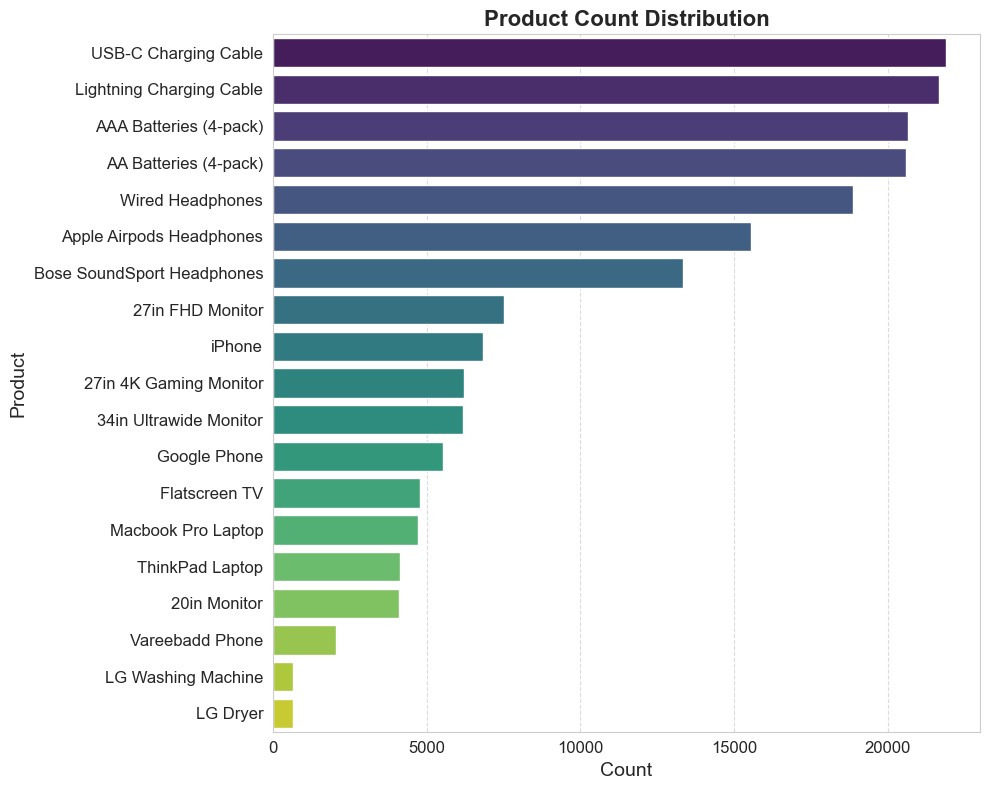

In [84]:
plt.figure(figsize=(10, 8)) 
sns.countplot(data=df,y="Product",order=df['Product'].value_counts().index,palette="viridis")
plt.title("Product Count Distribution", fontsize=16, fontweight='bold')  
plt.xlabel("Count", fontsize=14)  
plt.ylabel("Product", fontsize=14)  
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.tight_layout()  

plt.show()


### **City-wise Product Demand**

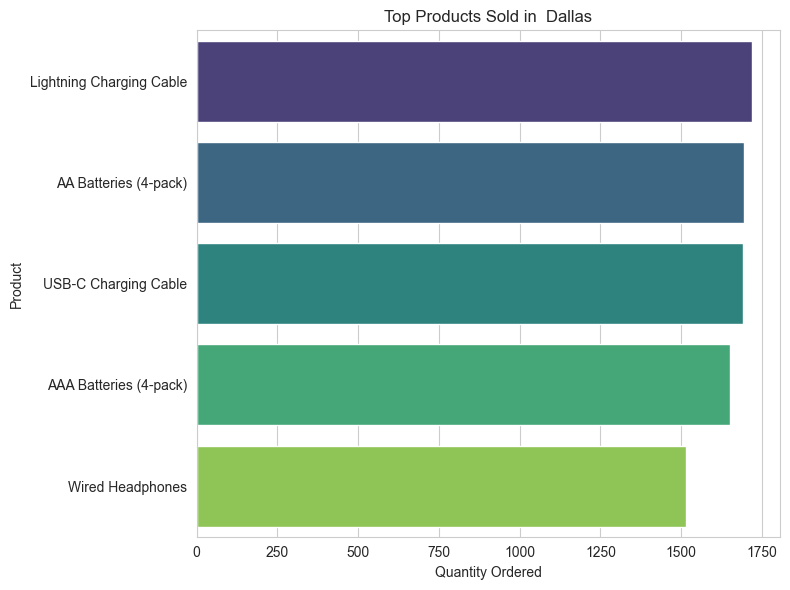

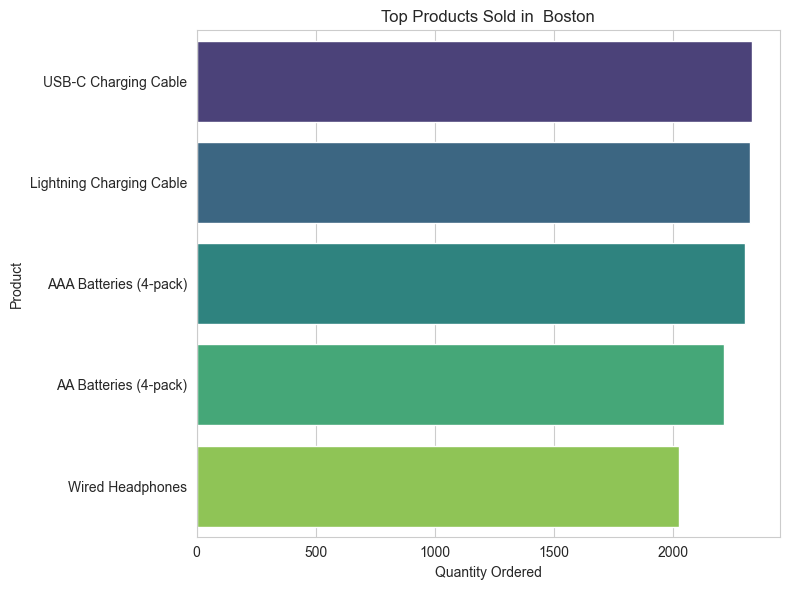

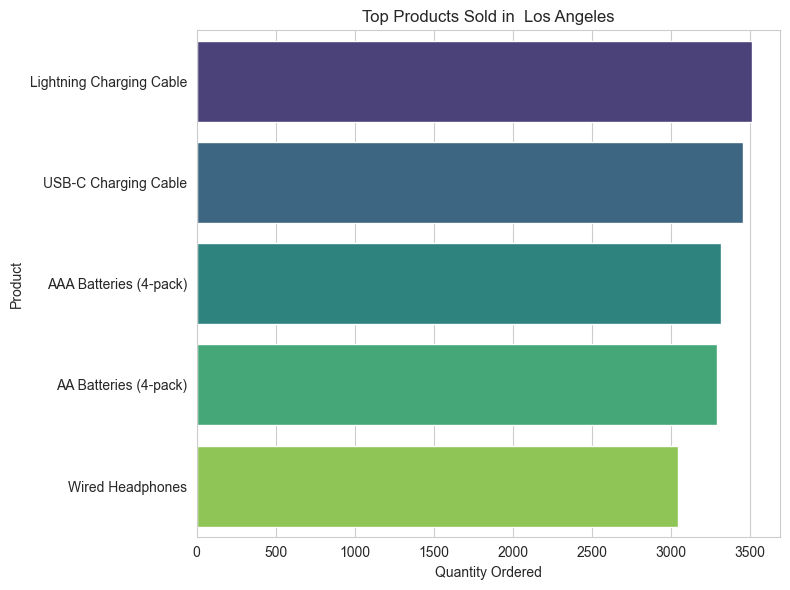

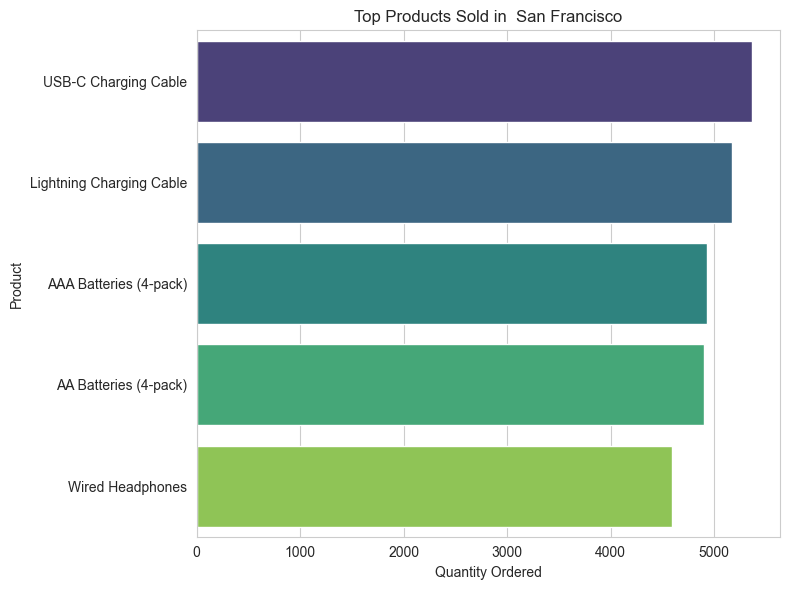

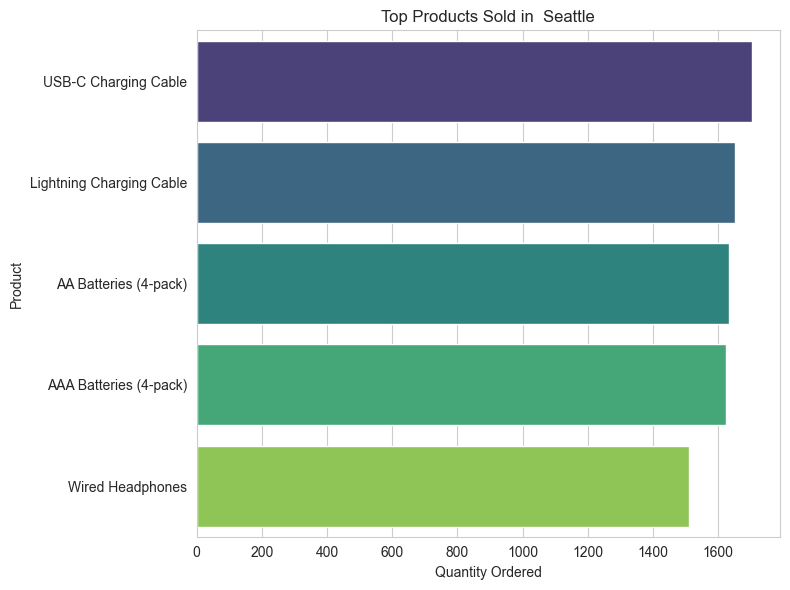

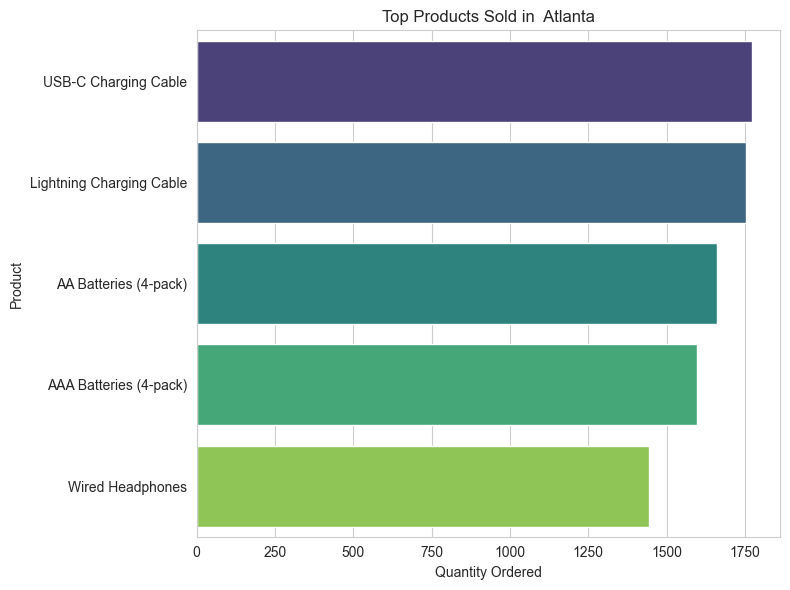

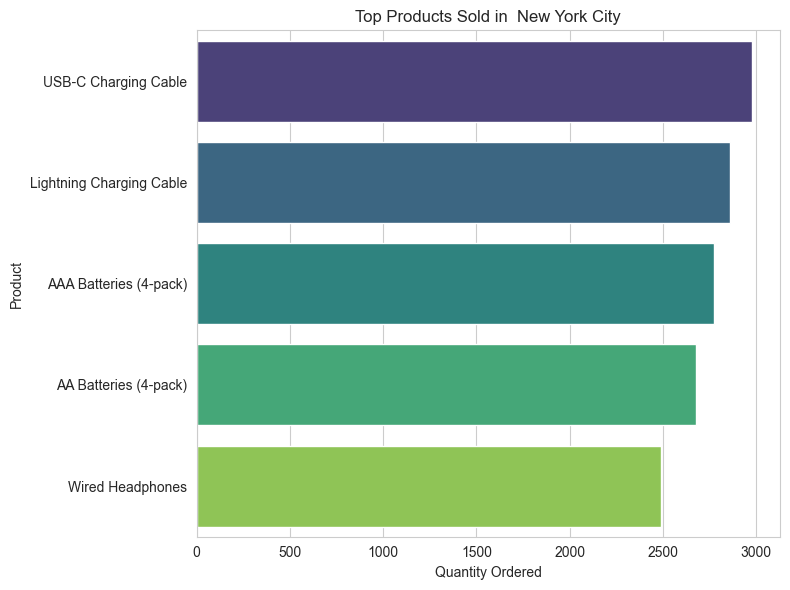

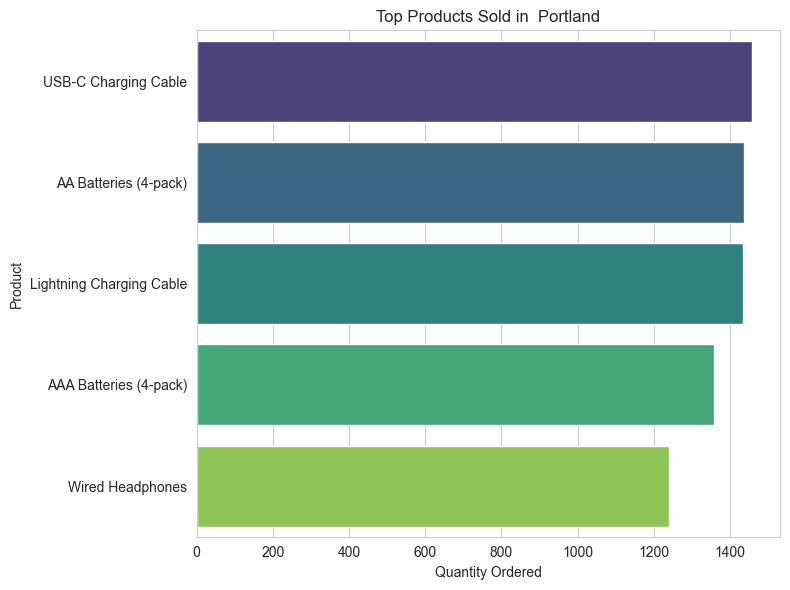

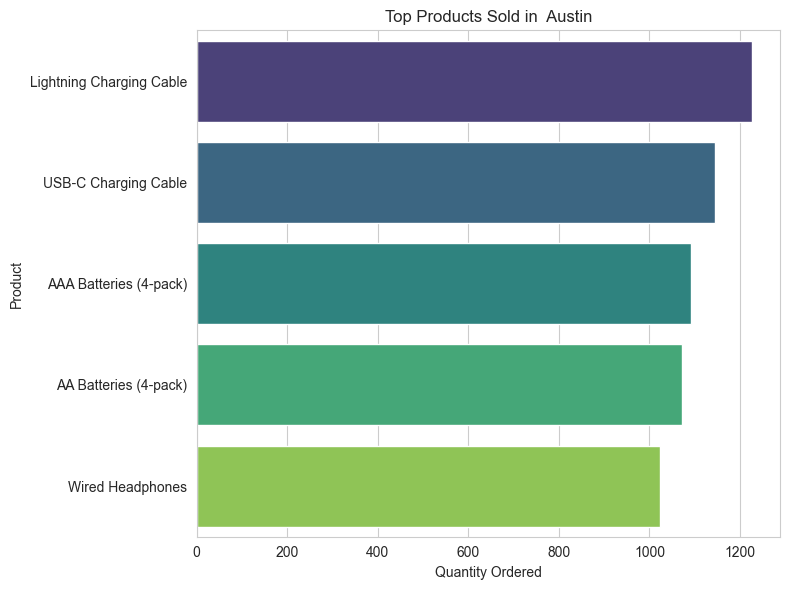

In [98]:
cities = df['City'].unique()
for city in cities:
    city_data = df[df["City"] == city]
    top_products = city_data["Product"].value_counts().nlargest(5)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
    plt.title(f"Top Products Sold in {city}")
    plt.xlabel("Quantity Ordered")
    plt.ylabel("Product")
    plt.tight_layout()
    plt.show()


---

### **Monthly Sales Trends by City**

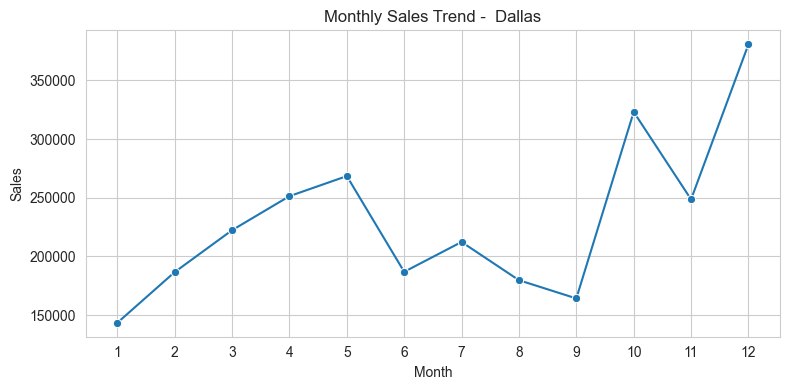

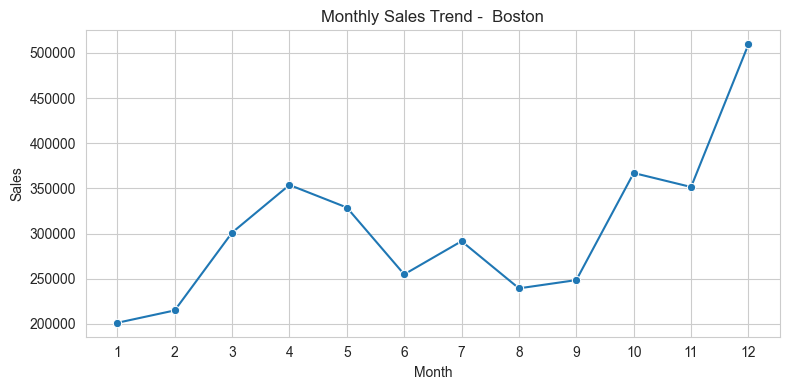

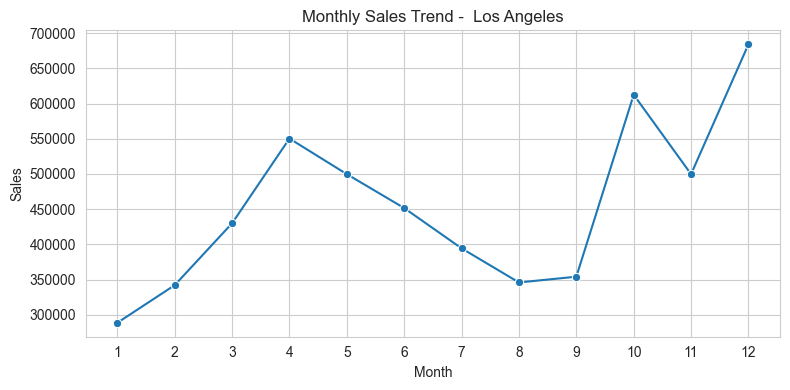

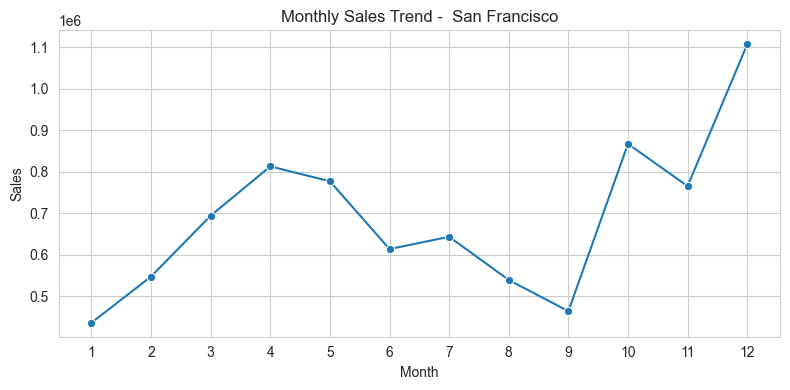

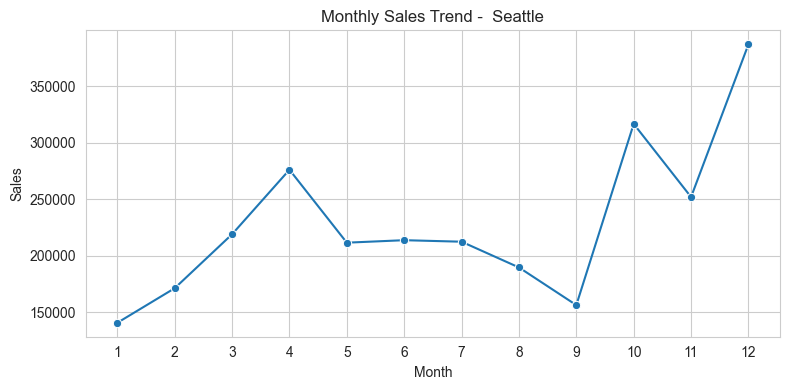

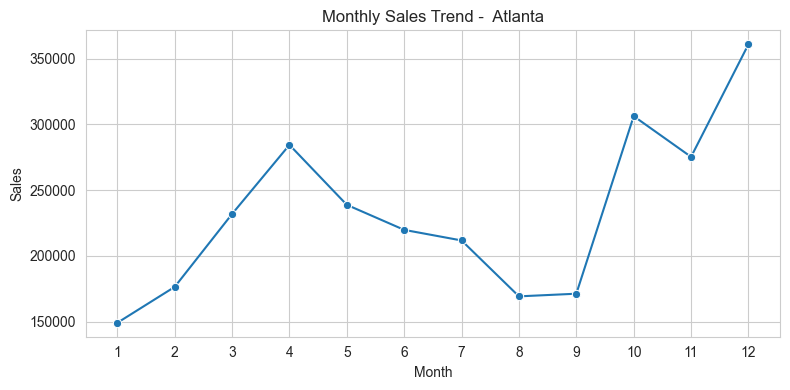

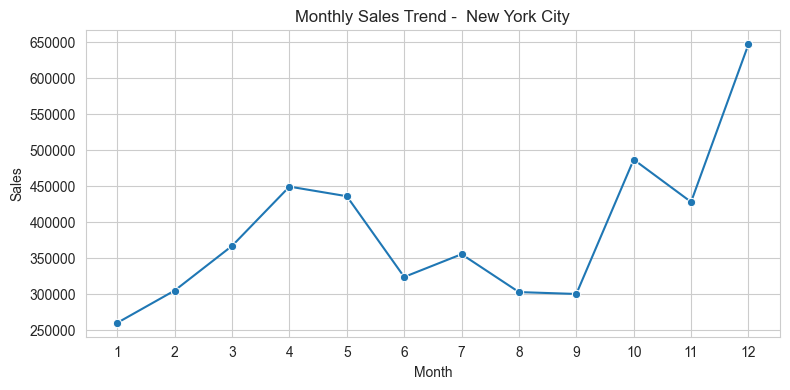

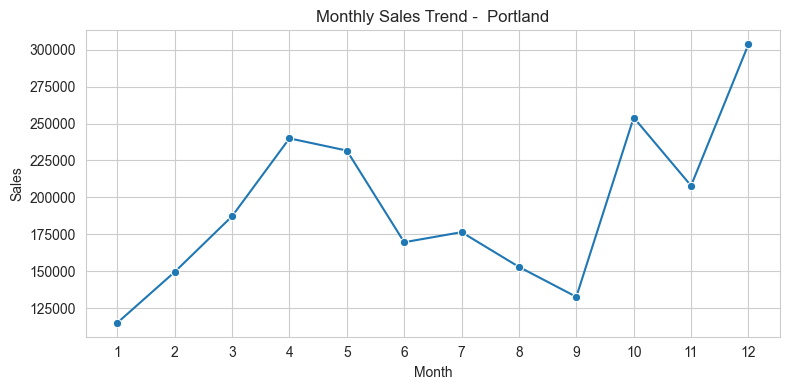

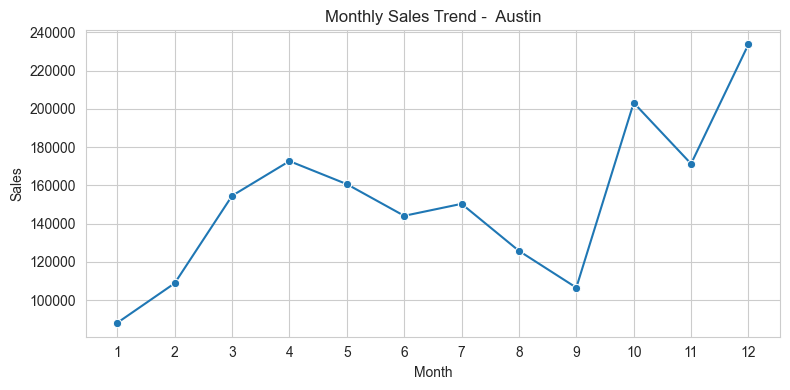

In [99]:
for city in cities:
    monthly_sales = df[df["City"] == city].groupby("Month")["Sales"].sum().reset_index()

    plt.figure(figsize=(8, 4))
    sns.lineplot(data=monthly_sales, x="Month", y="Sales", marker='o')
    plt.title(f"Monthly Sales Trend - {city}")
    plt.xticks(range(1, 13))
    plt.tight_layout()
    plt.show()


---

### **Hour-wise Order Volume (City-wise Demand Timing)**

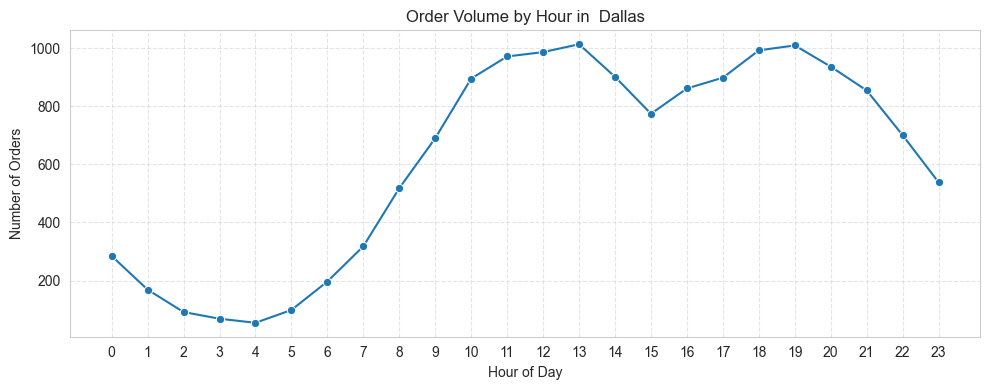

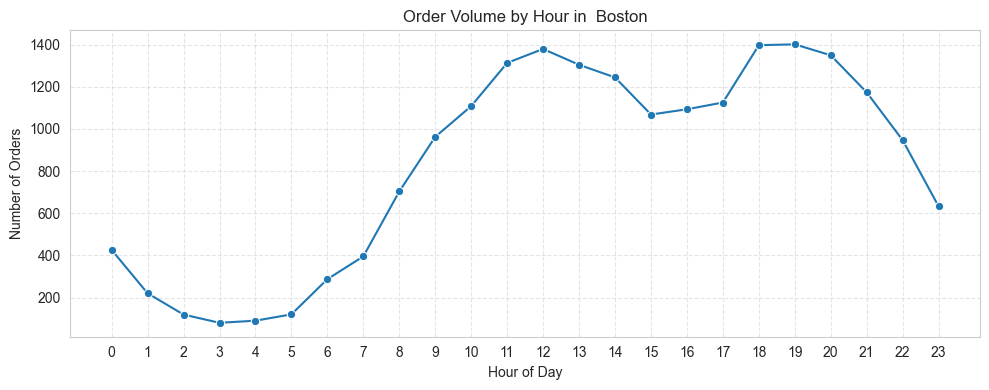

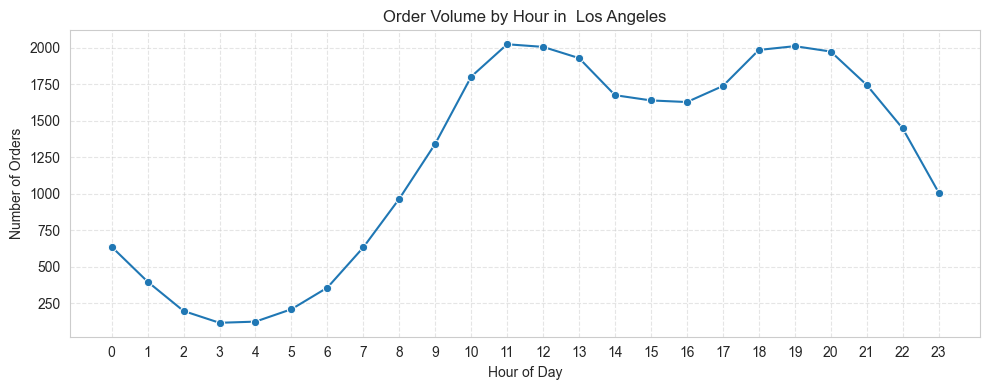

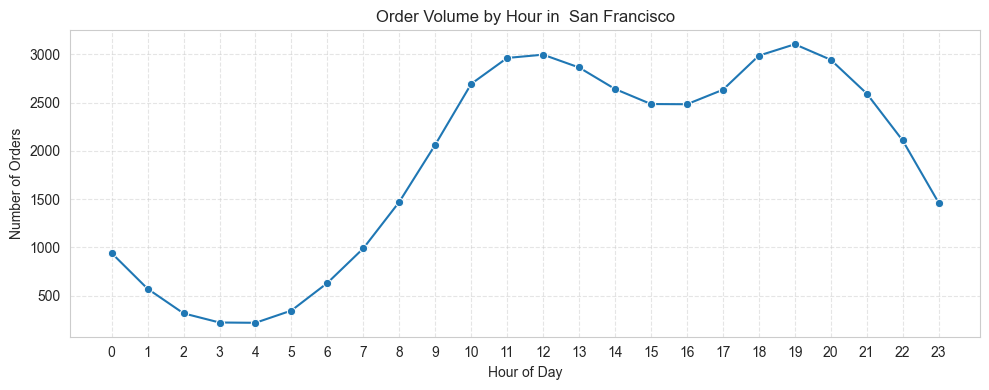

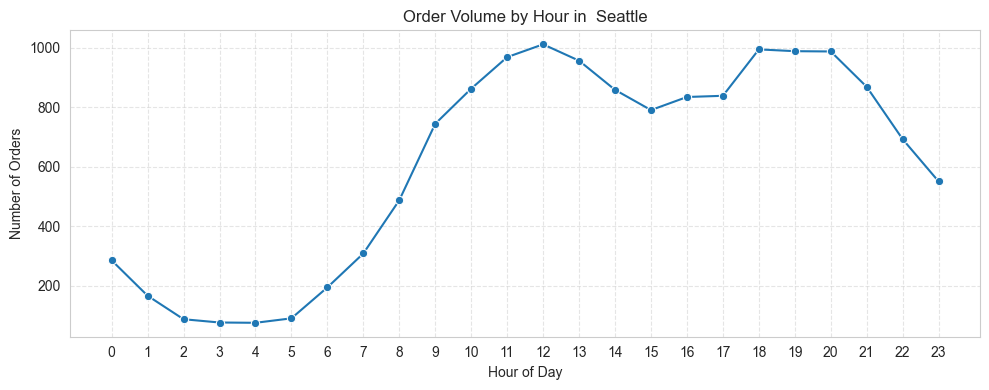

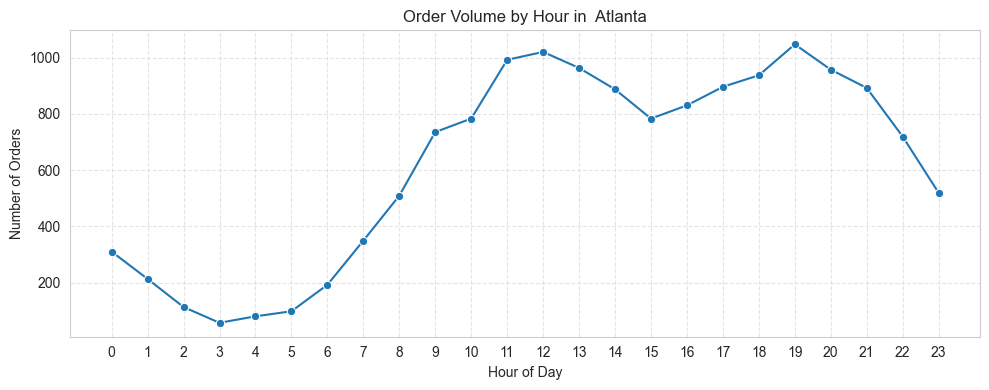

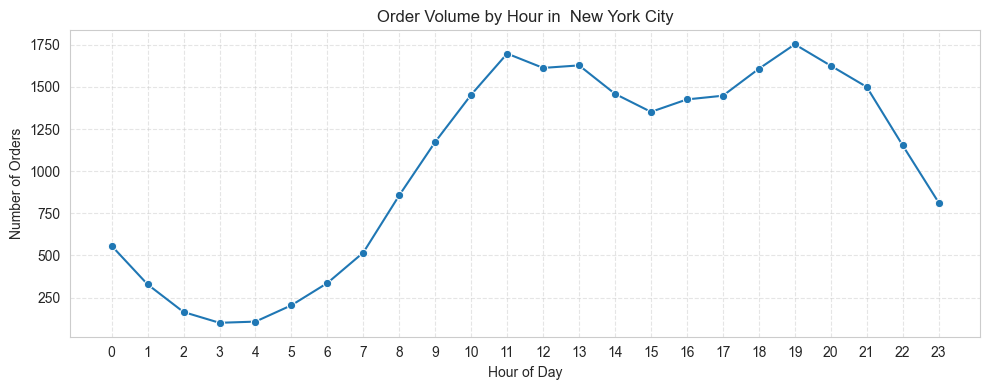

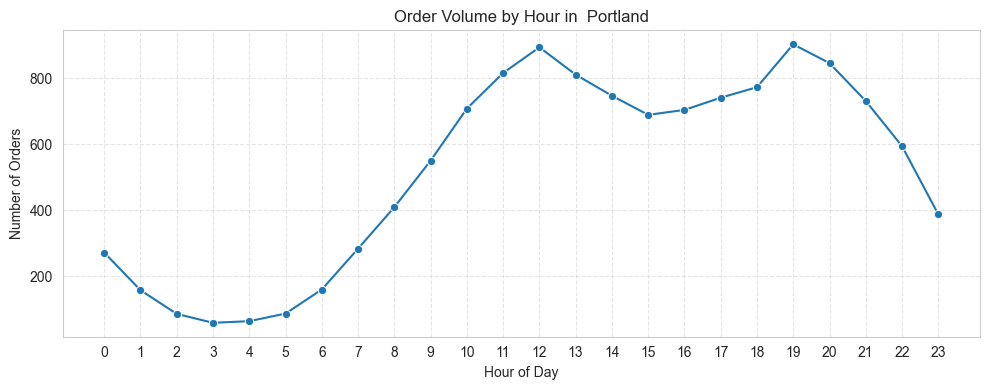

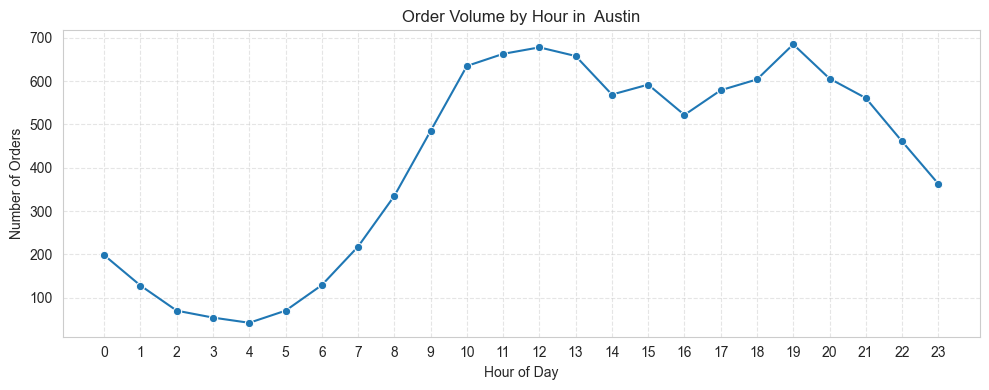

In [100]:
for city in cities:
    hourly = df[df["City"] == city]["Hour"].value_counts().sort_index()

    plt.figure(figsize=(10, 4))
    sns.lineplot(x=hourly.index, y=hourly.values, marker="o")
    plt.title(f"Order Volume by Hour in {city}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Orders")
    plt.xticks(range(0, 24))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


### **Product vs Total Sales**

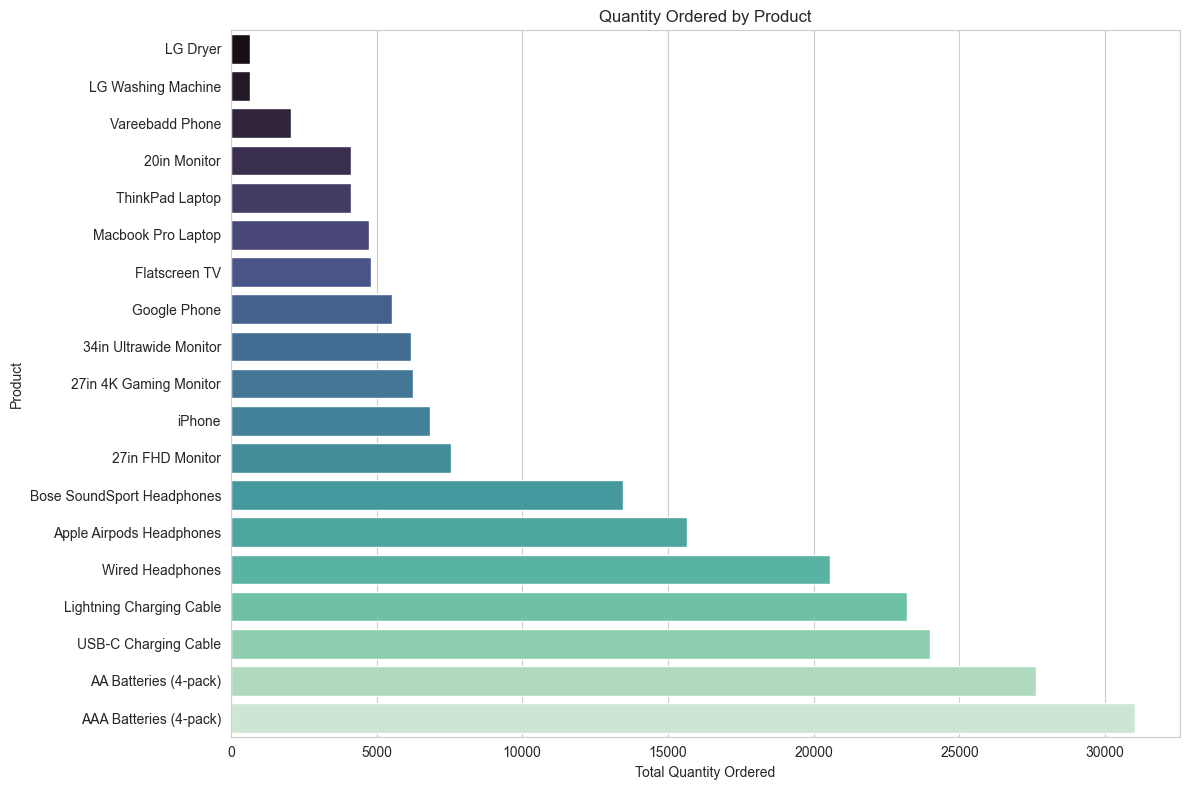

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=product_quantity.values, y=product_quantity.index, palette="mako")
plt.title("Quantity Ordered by Product")
plt.xlabel("Total Quantity Ordered")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


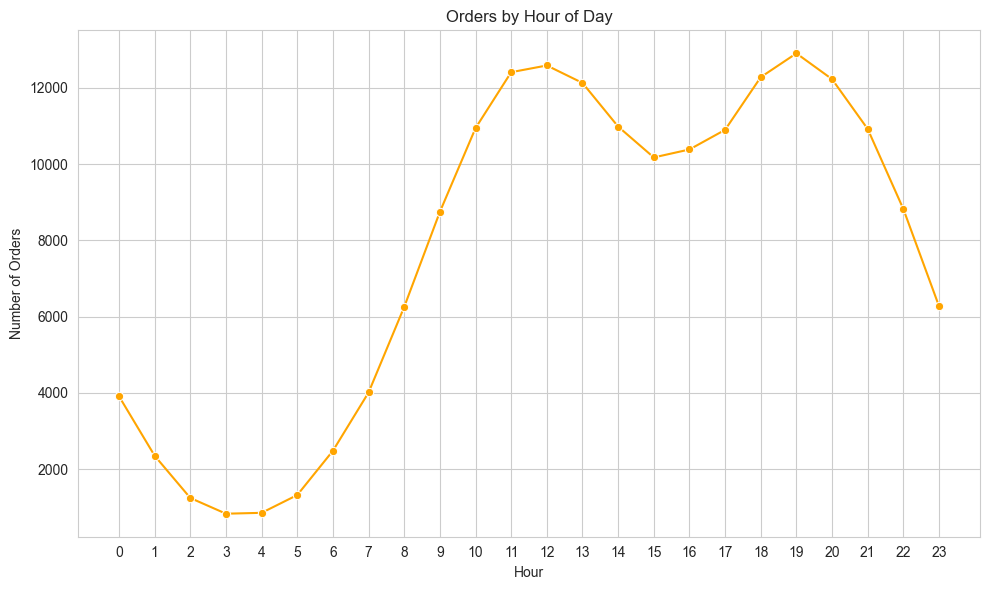

In [105]:
orders_by_hour = df.groupby("Hour").size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values, marker="o", color="orange")
plt.title("Orders by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: >

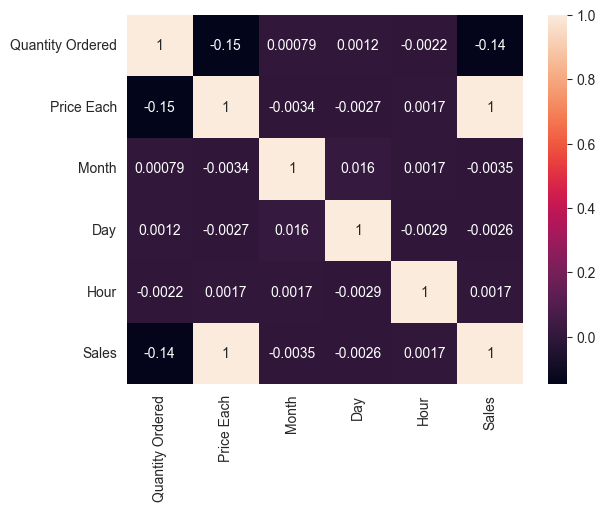

In [112]:
sns.heatmap(data = df.corr(numeric_only=True),annot=True)

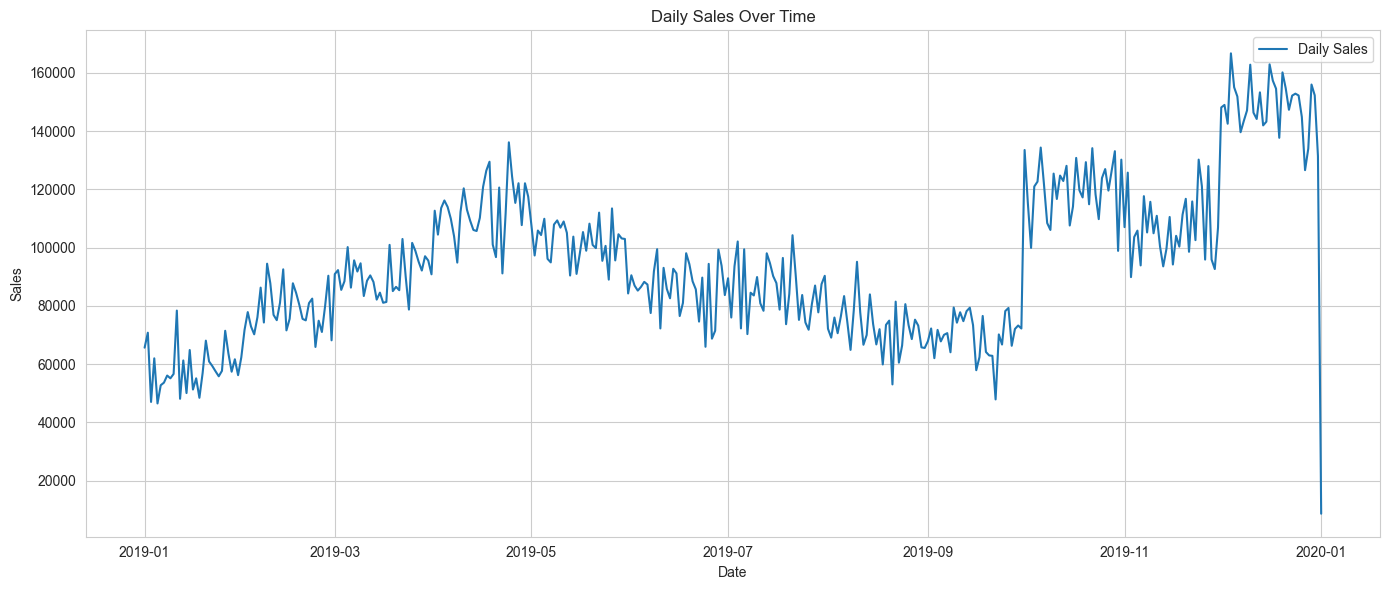

ADF Statistic: -2.3509, p-value: 0.1561


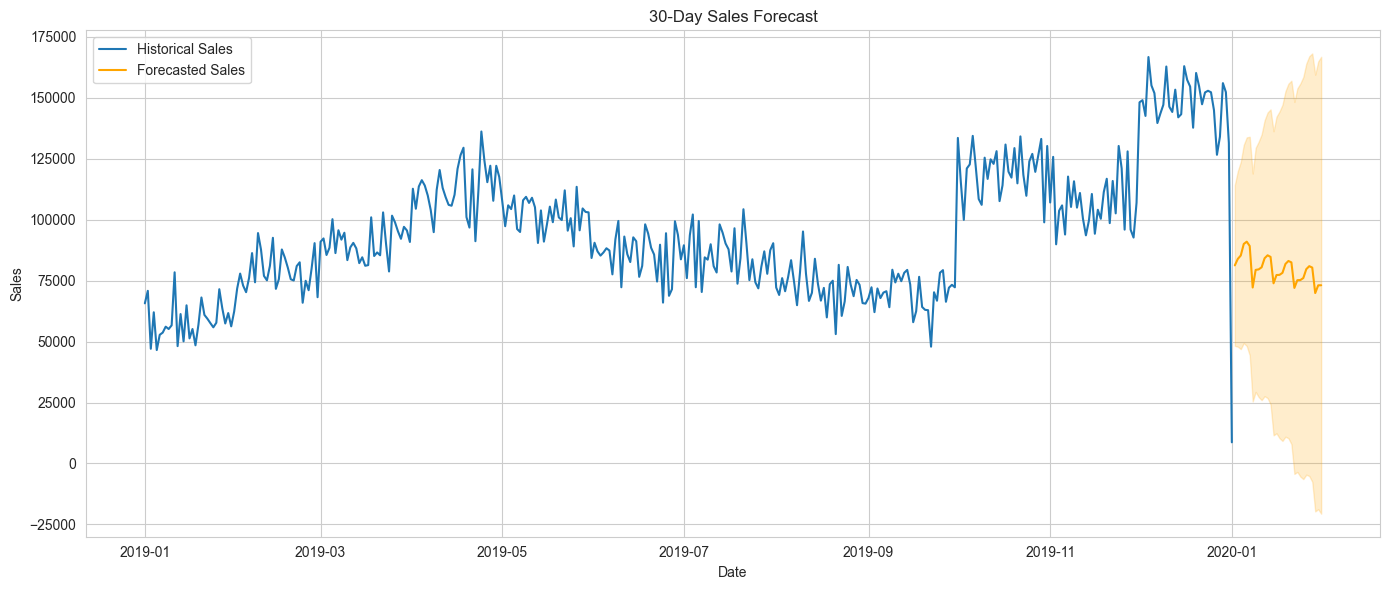

In [113]:

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings("ignore")

# 1. Prepare daily sales data
daily_sales = df.groupby("Order Date")["Sales"].sum().reset_index()
daily_sales.set_index("Order Date", inplace=True)

# 2. Check for missing dates (fill with 0)
all_dates = pd.date_range(start=daily_sales.index.min(), end=daily_sales.index.max())
daily_sales = daily_sales.reindex(all_dates, fill_value=0)
daily_sales.index.name = "Order Date"

# 3. Visualize
plt.figure(figsize=(14, 6))
plt.plot(daily_sales, label="Daily Sales")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Simple Stationarity Test
result = adfuller(daily_sales['Sales'])
print(f"ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}")
# p < 0.05 means stationary

# 5. Build ARIMA model
model = SARIMAX(daily_sales["Sales"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Weekly seasonality
results = model.fit()

# 6. Forecast next 30 days
forecast = results.get_forecast(steps=30)
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=30)

# 7. Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales["Sales"], label="Historical Sales")
plt.plot(forecast_index, forecast.predicted_mean, label="Forecasted Sales", color="orange")
plt.fill_between(forecast_index, forecast.conf_int()["lower Sales"], forecast.conf_int()["upper Sales"], color='orange', alpha=0.2)
plt.title("30-Day Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
